## Import Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Initialize DataFrame
city_weather_df= pd.DataFrame({
    "City": cities,
    "Cloudiness": "",
    "Country": "",
    "Date": "",
    "Humidity": "",
    "Lat": "",
    "Lng": "",
    "Max Temp": "",
    "Wind Speed": ""
})

#Set index to "City" column
city_weather_df.set_index("City", inplace= True)

In [4]:
#Set variables for URL and API Key
base_url= "https://api.openweathermap.org/data/2.5/weather?q="
appid= api_key

#Initialize Set Number
set_no= 1
#Gather number of sets necessary to run all iterations without exceeding OWM's requests per minute for free accounts
#The int() function rounds the float down to the nearest integer; + 1 has the effect of rounding up.  
all_sets= int(len(cities)/60) + 1

#Begin the outer loop, iterating each set
for i in range(0,all_sets):
#Reset Record Number to 1 at the start of the set
    record_no= 1
#Increment start in intervals of 60, beginning with 0
    start= i*60
#Increment end in intervals of 60, beginning with 60 (this number is excluded in the df.iloc split)
    end= start + 60

#Begin inner loop, iterating each record
    for city, row in city_weather_df.iloc[start:end,:].iterrows():

#Save the result of the request into a variable
        response= requests.get(f"{base_url}{city}&appid={appid}")

#If the Status Code is 200 (presumed successful)...
        if response.status_code == 200:
#...gather information from the response and save it to the DataFrame for the current row.
            row["Cloudiness"]= response.json()["clouds"]["all"]
            row["Country"]= response.json()["sys"]["country"]
            row["Date"]= response.json()["dt"]
            row["Humidity"]= response.json()["main"]["humidity"]
            row["Lat"]= response.json()["coord"]["lat"]
            row["Lng"]= response.json()["coord"]["lon"]
            row["Max Temp"]= response.json()["main"]["temp_max"]
            row["Wind Speed"]= response.json()["wind"]["speed"]
#Print success record
            print(f"Processing Record {record_no} of Set {set_no} | {city.title()}")
#Move to the next Record Number
            record_no= record_no + 1

#If the Status Code was not 200 (presumed unsuccessful)...
        else:
#Note the failure
            print(f"{city.title()} **not** found. Skipping...")

#Move to the next Set Number
    set_no= set_no + 1
#Run time.sleep() on all sets, excluding the last.
    while set_no <= all_sets:
        time.sleep(60)
        break

Processing Record 1 of Set 1 | Kapaa
Processing Record 2 of Set 1 | Albany
Processing Record 3 of Set 1 | Tual
Processing Record 4 of Set 1 | Rikitea
Processing Record 5 of Set 1 | Raudeberg
Processing Record 6 of Set 1 | Tripoli
Processing Record 7 of Set 1 | Tasiilaq
Processing Record 8 of Set 1 | Vikevag
Processing Record 9 of Set 1 | Bredasdorp
Belushya Guba **not** found. Skipping...
Processing Record 10 of Set 1 | Port Alfred
Processing Record 11 of Set 1 | Uglyanets
Processing Record 12 of Set 1 | Faanui
Processing Record 13 of Set 1 | Camargo
Processing Record 14 of Set 1 | Labuhan
Processing Record 15 of Set 1 | Bawku
Processing Record 16 of Set 1 | Yunguyo
Acarau **not** found. Skipping...
Taolanaro **not** found. Skipping...
Processing Record 17 of Set 1 | Lagoa
Pemangkat **not** found. Skipping...
Processing Record 18 of Set 1 | Bluff
Processing Record 19 of Set 1 | Hilo
Processing Record 20 of Set 1 | Busselton
Processing Record 21 of Set 1 | New Norfolk
Processing Record 

Processing Record 18 of Set 4 | Avarua
Processing Record 19 of Set 4 | Hukuntsi
Processing Record 20 of Set 4 | Deputatskiy
Processing Record 21 of Set 4 | Sao Filipe
Processing Record 22 of Set 4 | Emet
Processing Record 23 of Set 4 | Rio Gallegos
Bur Gabo **not** found. Skipping...
Processing Record 24 of Set 4 | Axim
Processing Record 25 of Set 4 | Havre-Saint-Pierre
Processing Record 26 of Set 4 | Vila Velha
Processing Record 27 of Set 4 | Bonfim
Processing Record 28 of Set 4 | Kavieng
Processing Record 29 of Set 4 | Miri
Paradwip **not** found. Skipping...
Processing Record 30 of Set 4 | Cabra
Processing Record 31 of Set 4 | Cukai
Toftir **not** found. Skipping...
Processing Record 32 of Set 4 | Noumea
Processing Record 33 of Set 4 | Longyearbyen
Processing Record 34 of Set 4 | Cidreira
Kozan **not** found. Skipping...
Processing Record 35 of Set 4 | Peshkopi
Processing Record 36 of Set 4 | Molchanovo
Processing Record 37 of Set 4 | Bar Harbor
Processing Record 38 of Set 4 | Paami

Processing Record 40 of Set 7 | Richards Bay
Processing Record 41 of Set 7 | Fukue
Processing Record 42 of Set 7 | Nizwa
Vaitupu **not** found. Skipping...
Processing Record 43 of Set 7 | Sabha
Processing Record 44 of Set 7 | Lasa
Processing Record 45 of Set 7 | Maraa
Processing Record 46 of Set 7 | Insar
Processing Record 47 of Set 7 | Port Macquarie
Processing Record 48 of Set 7 | Yacuiba
Processing Record 49 of Set 7 | Rodeo
Processing Record 50 of Set 7 | Flinders
Processing Record 51 of Set 7 | Soria
Processing Record 52 of Set 7 | Meulaboh
Processing Record 53 of Set 7 | Ostersund
Processing Record 54 of Set 7 | La Ronge
Processing Record 1 of Set 8 | Narsaq
Processing Record 2 of Set 8 | Nanortalik
Processing Record 3 of Set 8 | Bambanglipuro
Borama **not** found. Skipping...
Processing Record 4 of Set 8 | Leh
Processing Record 5 of Set 8 | Atar
Processing Record 6 of Set 8 | Klyuchi
Processing Record 7 of Set 8 | Luneville
Processing Record 8 of Set 8 | Ancud
Processing Record 

Processing Record 8 of Set 11 | Miramar
Processing Record 9 of Set 11 | Palmer
Processing Record 10 of Set 11 | Vondrozo
Processing Record 11 of Set 11 | Wonosobo
Processing Record 12 of Set 11 | Marsaxlokk
Processing Record 13 of Set 11 | Hirara


In [5]:
#Present the DataFrame
city_weather_df.head()

,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City,,,,,,,,
kapaa,90,US,1558844874,74,22.08,-159.32,301.15,4.6
albany,90,US,1558844745,67,42.65,-73.75,289.26,4.6
tual,71,ID,1558844875,79,-5.67,132.75,301.812,7.13
rikitea,100,PF,1558844875,89,-23.12,-134.97,296.212,8.35
raudeberg,43,NO,1558844875,75,61.99,5.14,280.15,4.6


In [6]:
#Remove failures from the DataFrame (all rows are empty; "Cloudiness" was selected arbitrarily as this is the first column)
city_weather_df_no_na= city_weather_df.loc[city_weather_df["Cloudiness"] != ""]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#I wanted to save multiple graphs for comparison
#Get local datetime
now= datetime.datetime.now()
#Format datetime for use in the Titles of the graphs
now_figtitle= now.strftime("%m/%d/%y")
#Format datetime for use when naming the csv and png files
now_savefig= now.strftime("%d%b%Y_%H%M").upper()

In [8]:
#Save the cleaned DataFrame to a csv
city_weather_df_no_na.to_csv(f"Resources/City_Weather_{now_savefig}.csv")
#Resave the cleaned csv to replace the original DataFrame (not necessary, but this variable name looks better in the analysis)
city_weather_df= pd.read_csv(f"Resources/City_Weather_{now_savefig}.csv")
#Present the DataFrame
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kapaa,90,US,1558844874,74,22.08,-159.32,301.150,4.60
1,albany,90,US,1558844745,67,42.65,-73.75,289.260,4.60
2,tual,71,ID,1558844875,79,-5.67,132.75,301.812,7.13
3,rikitea,100,PF,1558844875,89,-23.12,-134.97,296.212,8.35
4,raudeberg,43,NO,1558844875,75,61.99,5.14,280.150,4.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

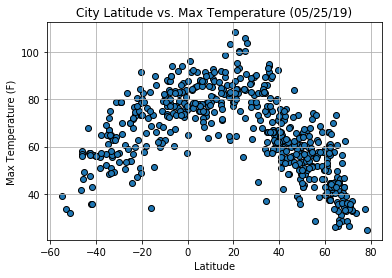

In [9]:
#Plot the data
plt.scatter(
    city_weather_df["Lat"],
#Convert from Kelvins to Fahrenheit
    (city_weather_df["Max Temp"]- 273.15) * 9/5 + 32,
    edgecolors="k",
)

#Add plot elements
plt.title(f"City Latitude vs. Max Temperature ({now_figtitle})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#Save the figure (ddMONyyyy_hhmm)
plt.savefig(f"Images/MaxTemp_{now_savefig}")


#### Latitude vs. Humidity Plot

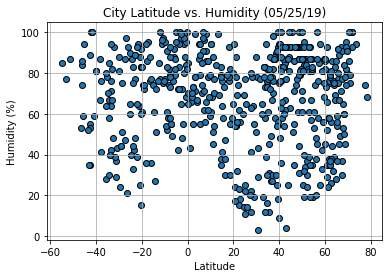

In [10]:
#Plot the data
plt.scatter(
    city_weather_df["Lat"],
    city_weather_df["Humidity"],
    edgecolors="k",
)

#Add plot elements
plt.title(f"City Latitude vs. Humidity ({now_figtitle})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#Save the figure (ddMONyyyy_hhmm)
plt.savefig(f"Images/Humidity_{now_savefig}")

#### Latitude vs. Cloudiness Plot

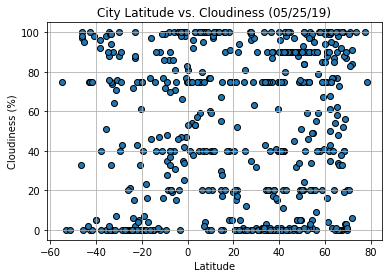

In [11]:
#Plot the data
plt.scatter(
    city_weather_df["Lat"],
    city_weather_df["Cloudiness"],
    edgecolors="k",
)

#Add plot elements
plt.title(f"City Latitude vs. Cloudiness ({now_figtitle})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#Save the figure (ddMONyyyy_hhmm)
plt.savefig(f"Images/Cloudiness_{now_savefig}")

#### Latitude vs. Wind Speed Plot

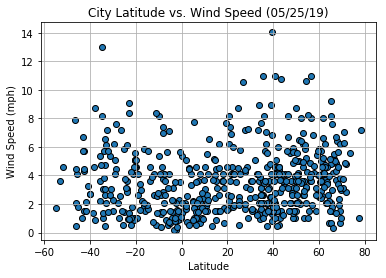

In [12]:
#Plot the data
plt.scatter(
    city_weather_df["Lat"],
    city_weather_df["Wind Speed"],
    edgecolors="k",
)

#Add plot elements
plt.title(f"City Latitude vs. Wind Speed ({now_figtitle})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#Save the figure (ddMONyyyy_hhmm)
plt.savefig(f"Images/WindSpeed_{now_savefig}")